## Introduction

---

This dataset contains demographic and banking-related information of customers of a bank. This dataset can be used to understand the customer base of the bank and to predict customer churn. Customer churn is an important topic for banks to understand and address in order to retain customers and reduce customer loss.

**Taken from: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset**

**Let's begin the analysis by loading the dataset and performing some initial exploration**

## 📚 Importing Libraries & Data

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

## 🛠️  EDA

---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df = df.drop(columns = "churn")

In [5]:
df["gender"] = df["gender"].convert_dtypes()

In [6]:
df["country"] = df["country"].convert_dtypes()

In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [8]:
def categorize(age):
    if 18 <= age <= 29:
        return '18-29'
    elif 30 <= age <= 40:
        return '30-40'
    elif 40 < age <= 59:
        return '41-59'
    elif age >= 60:
        return 'Over 60'
  

In [9]:
df['age_category'] = df['age'].apply(categorize)

In [10]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,age_category
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,41-59
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,41-59
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,41-59
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,30-40
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,41-59


In [11]:
def categorize_balance(balance):
    if balance == 0:
        return 'No Balance'
    elif  balance <= 100000:
        return 'Silver'
    elif  balance <= 200000:
        return 'Gold'
    else:
        return 'Platinum'

In [12]:
df['categorize_balance'] = df['balance'].apply(categorize_balance)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,age_category,categorize_balance
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,41-59,No Balance
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,41-59,Silver
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,41-59,Gold
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,30-40,No Balance
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,41-59,Gold


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   credit_score        10000 non-null  int64  
 2   country             10000 non-null  string 
 3   gender              10000 non-null  string 
 4   age                 10000 non-null  int64  
 5   tenure              10000 non-null  int64  
 6   balance             10000 non-null  float64
 7   products_number     10000 non-null  int64  
 8   credit_card         10000 non-null  int64  
 9   active_member       10000 non-null  int64  
 10  estimated_salary    10000 non-null  float64
 11  age_category        10000 non-null  object 
 12  categorize_balance  10000 non-null  object 
dtypes: float64(2), int64(7), object(2), string(2)
memory usage: 1015.8+ KB


In [14]:
df["age_category"] = df["age_category"].convert_dtypes()

In [15]:
df["categorize_balance"] = df["categorize_balance"].convert_dtypes()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   credit_score        10000 non-null  int64  
 2   country             10000 non-null  string 
 3   gender              10000 non-null  string 
 4   age                 10000 non-null  int64  
 5   tenure              10000 non-null  int64  
 6   balance             10000 non-null  float64
 7   products_number     10000 non-null  int64  
 8   credit_card         10000 non-null  int64  
 9   active_member       10000 non-null  int64  
 10  estimated_salary    10000 non-null  float64
 11  age_category        10000 non-null  string 
 12  categorize_balance  10000 non-null  string 
dtypes: float64(2), int64(7), string(4)
memory usage: 1015.8 KB


In [17]:
France = df[df["country"] == "France"] #we make a new dataframe from France

In [18]:
Spain = df[df["country"] == "Spain"] #we make a new dataframe from Spain

In [19]:
Germany = df[df["country"] == "Germany"] #we make a new dataframe from Cermany

###  Customer distribution per country

---

In [20]:
country_counts = df.groupby("country")[["customer_id"]].count() 

In [21]:
country_counts.rename(columns={"customer_id": "count"}, inplace=True)
country_counts

,count
country,
France,5014
Germany,2509
Spain,2477


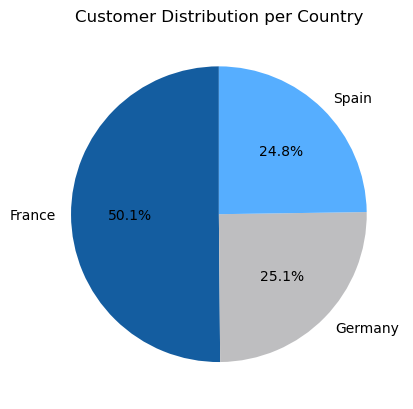

In [22]:
colors = [ '#145da0', '#bebec0','#56aeff']
country_counts['count'].plot.pie(colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Customer Distribution per Country')
plt.ylabel('')   


plt.show()

###  Customer Distribution by Category in France, Germany, and Spain

---

In [23]:
customer_gategory_france = France.groupby(["country","categorize_balance"])["customer_id"].count().reset_index()
customer_gategory_france["percent"] = customer_gategory_france["customer_id"]/ customer_gategory_france["customer_id"].sum()
customer_gategory_france

,country,categorize_balance,customer_id,percent
0,France,Gold,1892,0.377343
1,France,No Balance,2418,0.482250
2,France,Platinum,16,0.003191
3,France,Silver,688,0.137216


In [24]:
customer_gategory_germany = Germany.groupby(["country","categorize_balance"])["customer_id"].count().reset_index()
customer_gategory_germany["percent"] = customer_gategory_germany["customer_id"]/ customer_gategory_germany["customer_id"].sum()
customer_gategory_germany

,country,categorize_balance,customer_id,percent
0,Germany,Gold,1960,0.781188
1,Germany,Platinum,6,0.002391
2,Germany,Silver,543,0.216421


In [25]:
customer_gategory_spain = Spain.groupby(["country","categorize_balance"])["customer_id"].count().reset_index()
customer_gategory_spain["percent"] = customer_gategory_spain["customer_id"]/ customer_gategory_spain["customer_id"].sum()
customer_gategory_spain

,country,categorize_balance,customer_id,percent
0,Spain,Gold,913,0.368591
1,Spain,No Balance,1199,0.484053
2,Spain,Platinum,12,0.004845
3,Spain,Silver,353,0.142511


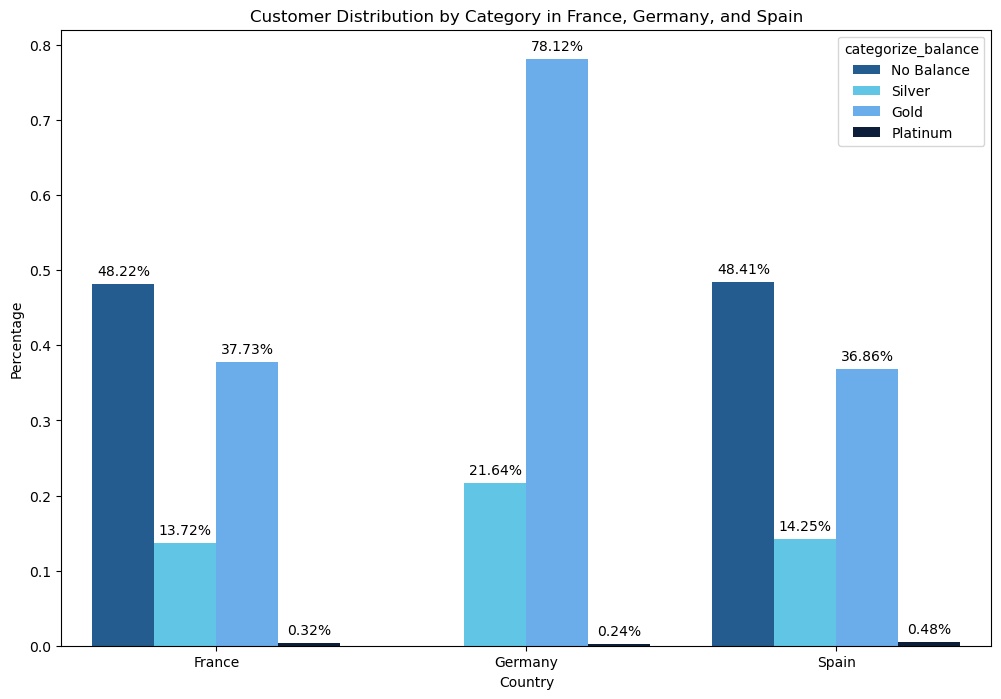

In [26]:

custom_palette = {
    'No Balance': '#145da0',  
    'Silver': '#4bd1fb',
    'Gold': '#56aeff',
    'Platinum': '#051d40'
}

customer_category_combined = pd.concat([customer_gategory_france, customer_gategory_germany, customer_gategory_spain])

categories = ['No Balance', 'Silver', 'Gold', 'Platinum']
countries = ['France', 'Germany', 'Spain']

full_data = []
for country in countries:
    for category in categories:
        subset = customer_category_combined[
            (customer_category_combined['country'] == country) &
            (customer_category_combined['categorize_balance'] == category)
        ]
        if subset.empty:
            full_data.append({'country': country, 'categorize_balance': category, 'customer_id': 0, 'percent': 0})
        else:
            full_data.append(subset.iloc[0].to_dict())

full_customer_category_combined = pd.DataFrame(full_data)

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='country', y='percent', hue='categorize_balance', 
    data=full_customer_category_combined, 
    palette=custom_palette
)

plt.title('Customer Distribution by Category in France, Germany, and Spain')
plt.xlabel('Country')
plt.ylabel('Percentage')

for p in ax.patches:
    if p.get_height() > 0:  
        ax.annotate(
            f"{p.get_height():.2%}", 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='center', 
            xytext=(0, 9), 
            textcoords='offset points'
        )

plt.show()



### Product segmentation 

---

In [36]:
france_products = France[France["tenure"] <= 2].groupby(["country", "products_number"])["customer_id"].count().reset_index()
germany_products = Germany[Germany["tenure"]<=2].groupby(["country","products_number"])["customer_id"].count().reset_index()
spain_products = Spain[Spain["tenure"]<=2].groupby(["country","products_number"])["customer_id"].count().reset_index()

In [37]:
france_products["Percentage"] = france_products["customer_id"]/france_products["customer_id"].sum() *100
germany_products["Percentage"] = germany_products["customer_id"]/germany_products["customer_id"].sum() *100
spain_products["Percentage"] = spain_products["customer_id"]/spain_products["customer_id"].sum() *100

In [38]:
france_products

,country,products_number,customer_id,Percentage
0,France,1,632,50.198570
1,France,2,595,47.259730
2,France,3,25,1.985703
3,France,4,7,0.555997


In [39]:
germany_products

,country,products_number,customer_id,Percentage
0,Germany,1,332,51.552795
1,Germany,2,282,43.788820
2,Germany,3,23,3.571429
3,Germany,4,7,1.086957


In [40]:
spain_products

,country,products_number,customer_id,Percentage
0,Spain,1,313,52.782462
1,Spain,2,268,45.193929
2,Spain,3,11,1.854975
3,Spain,4,1,0.168634


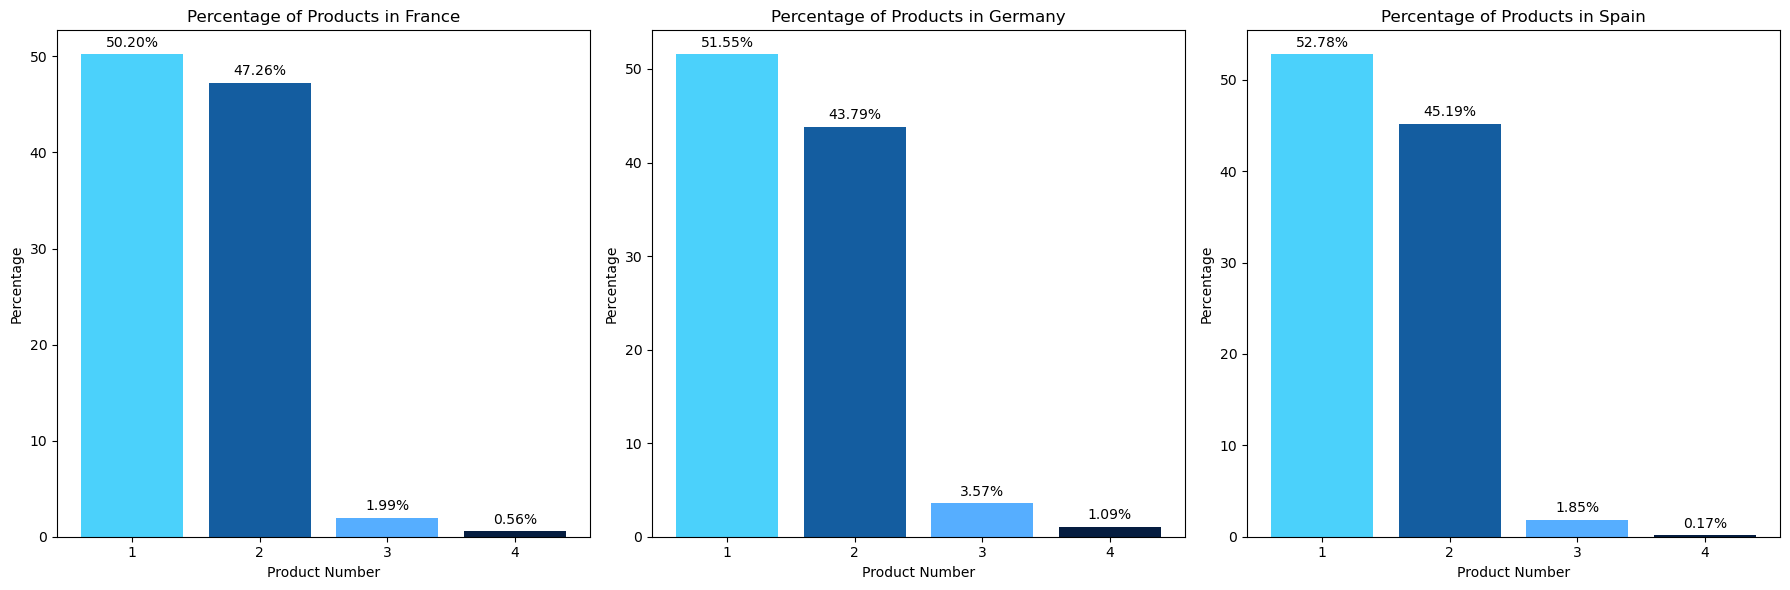

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Custom color palette
custom_palette = {
    1: '#4bd1fb',  
    2: '#145da0',
    3: '#56aeff',
    4: '#051d40'
}

# Plotting for France
for i in range(len(france_products['products_number'])):
    product_num = france_products['products_number'][i]
    axs[0].bar(product_num, france_products['Percentage'][i], color=custom_palette.get(product_num, '#333333'))
    axs[0].text(product_num, france_products['Percentage'][i] + 0.5, 
                f"{france_products['Percentage'][i]:.2f}%", ha='center', va='bottom')
axs[0].set_title('Percentage of Products in France')
axs[0].set_xlabel('Product Number')
axs[0].set_ylabel('Percentage')
axs[0].set_xticks(france_products['products_number'])

# Plotting for Germany
for i in range(len(germany_products['products_number'])):
    product_num = germany_products['products_number'][i]
    axs[1].bar(product_num, germany_products['Percentage'][i], color=custom_palette.get(product_num, '#333333'))
    axs[1].text(product_num, germany_products['Percentage'][i] + 0.5, 
                f"{germany_products['Percentage'][i]:.2f}%", ha='center', va='bottom')
axs[1].set_title('Percentage of Products in Germany')
axs[1].set_xlabel('Product Number')
axs[1].set_ylabel('Percentage')
axs[1].set_xticks(germany_products['products_number'])

# Plotting for Spain
for i in range(len(spain_products['products_number'])):
    product_num = spain_products['products_number'][i]
    axs[2].bar(product_num, spain_products['Percentage'][i], color=custom_palette.get(product_num, '#333333'))
    axs[2].text(product_num, spain_products['Percentage'][i] + 0.5, 
                f"{spain_products['Percentage'][i]:.2f}%", ha='center', va='bottom')
axs[2].set_title('Percentage of Products in Spain')
axs[2].set_xlabel('Product Number')
axs[2].set_ylabel('Percentage')
axs[2].set_xticks(spain_products['products_number'])

plt.tight_layout()
plt.show()


### Count of customer id per country

---

In [42]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,age_category,categorize_balance
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,41-59,No Balance
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,41-59,Silver
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,41-59,Gold
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,30-40,No Balance
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,41-59,Gold


In [43]:
France.groupby(["country", "products_number"])["customer_id"].count().reset_index()

,country,products_number,customer_id
0,France,1,2514
1,France,2,2367
2,France,3,104
3,France,4,29


In [44]:
Germany.groupby(["country","products_number"])["customer_id"].count().reset_index()


,country,products_number,customer_id
0,Germany,1,1349
1,Germany,2,1040
2,Germany,3,96
3,Germany,4,24


In [45]:
Spain.groupby(["country","products_number"])["customer_id"].count().reset_index()

,country,products_number,customer_id
0,Spain,1,1221
1,Spain,2,1183
2,Spain,3,66
3,Spain,4,7


---

## Conclusion💥

📌 We analyzed the tenure of the customers and combined with the products' usage, **we recommended strategies in order to retain customers' loyalty to the Bank.**  